In [1]:
import sys
import glob
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Add parent directory to Python path to find local modules
sys.path.insert(0, '..')

In [3]:
from utils.utils import parse_nccl_log, parse_multiple_logs, performance_data_to_dataframe

In [4]:
from utils.plotting import plot_nccl_performance, plot_nccl_comparison_matrix

## Input files

In [7]:
log_files = glob.glob('../slurm-Jun4-*.out')

In [8]:
log_files

['../slurm-Jun4-1045967.out',
 '../slurm-Jun4-1045963.out',
 '../slurm-Jun4-1045964.out',
 '../slurm-Jun4-1045968.out',
 '../slurm-Jun4-1045971.out',
 '../slurm-Jun4-1045969.out',
 '../slurm-Jun4-1045970.out',
 '../slurm-Jun4-1045966.out',
 '../slurm-Jun4-1045972.out',
 '../slurm-Jun4-1045962.out',
 '../slurm-Jun4-1045977.out',
 '../slurm-Jun4-1045965.out',
 '../slurm-Jun4-1045974.out',
 '../slurm-Jun4-1045973.out',
 '../slurm-Jun4-1045961.out',
 '../slurm-Jun4-1045978.out',
 '../slurm-Jun4-1045976.out',
 '../slurm-Jun4-1045975.out']

## Extract performance data

In [9]:
all_perf_data = [parse_nccl_log(log_file) for log_file in log_files]

In [10]:
perf_df = performance_data_to_dataframe(all_perf_data)

In [11]:
perf_df.head()

,jobid,nccl_version,uses_alt_read,num_nodes,num_gpus,avg_bus_bandwidth,size_bytes,count_elements,type,redop,root,oop_time_us,oop_algbw_gbps,oop_busbw_gbps,oop_wrong,ip_time_us,ip_algbw_gbps,ip_busbw_gbps,ip_wrong
0,1045967,2.21.5,False,2,8,39.8463,32768,8192,float,sum,-1,51.20,0.64,1.12,0,63.61,0.52,0.90,0
1,1045967,2.21.5,False,2,8,39.8463,65536,16384,float,sum,-1,73.81,0.89,1.55,0,38.89,1.69,2.95,0
2,1045967,2.21.5,False,2,8,39.8463,131072,32768,float,sum,-1,83.01,1.58,2.76,0,53.12,2.47,4.32,0
3,1045967,2.21.5,False,2,8,39.8463,262144,65536,float,sum,-1,107.50,2.44,4.27,0,175.10,1.50,2.62,0
4,1045967,2.21.5,False,2,8,39.8463,524288,131072,float,sum,-1,283.80,1.85,3.23,0,195.30,2.68,4.70,0


## Visualizations

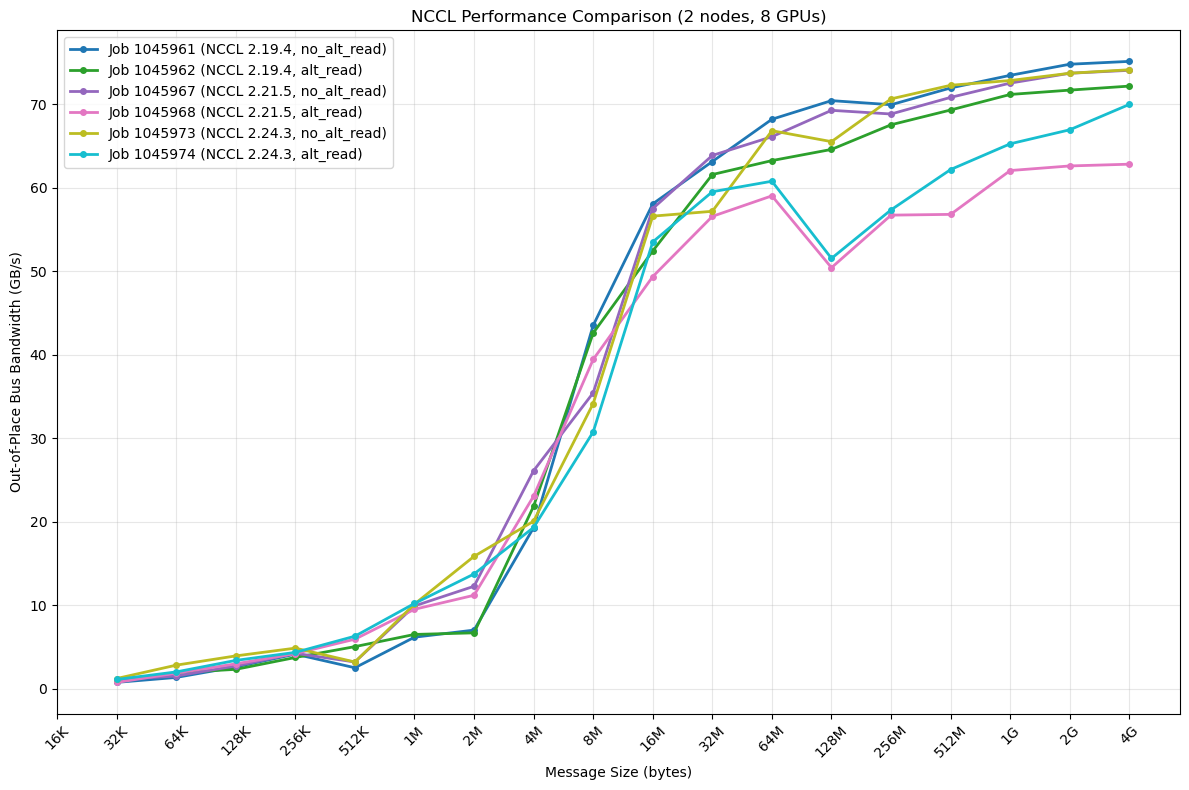

In [14]:
plot_nccl_performance(perf_df, target_num_nodes=2);

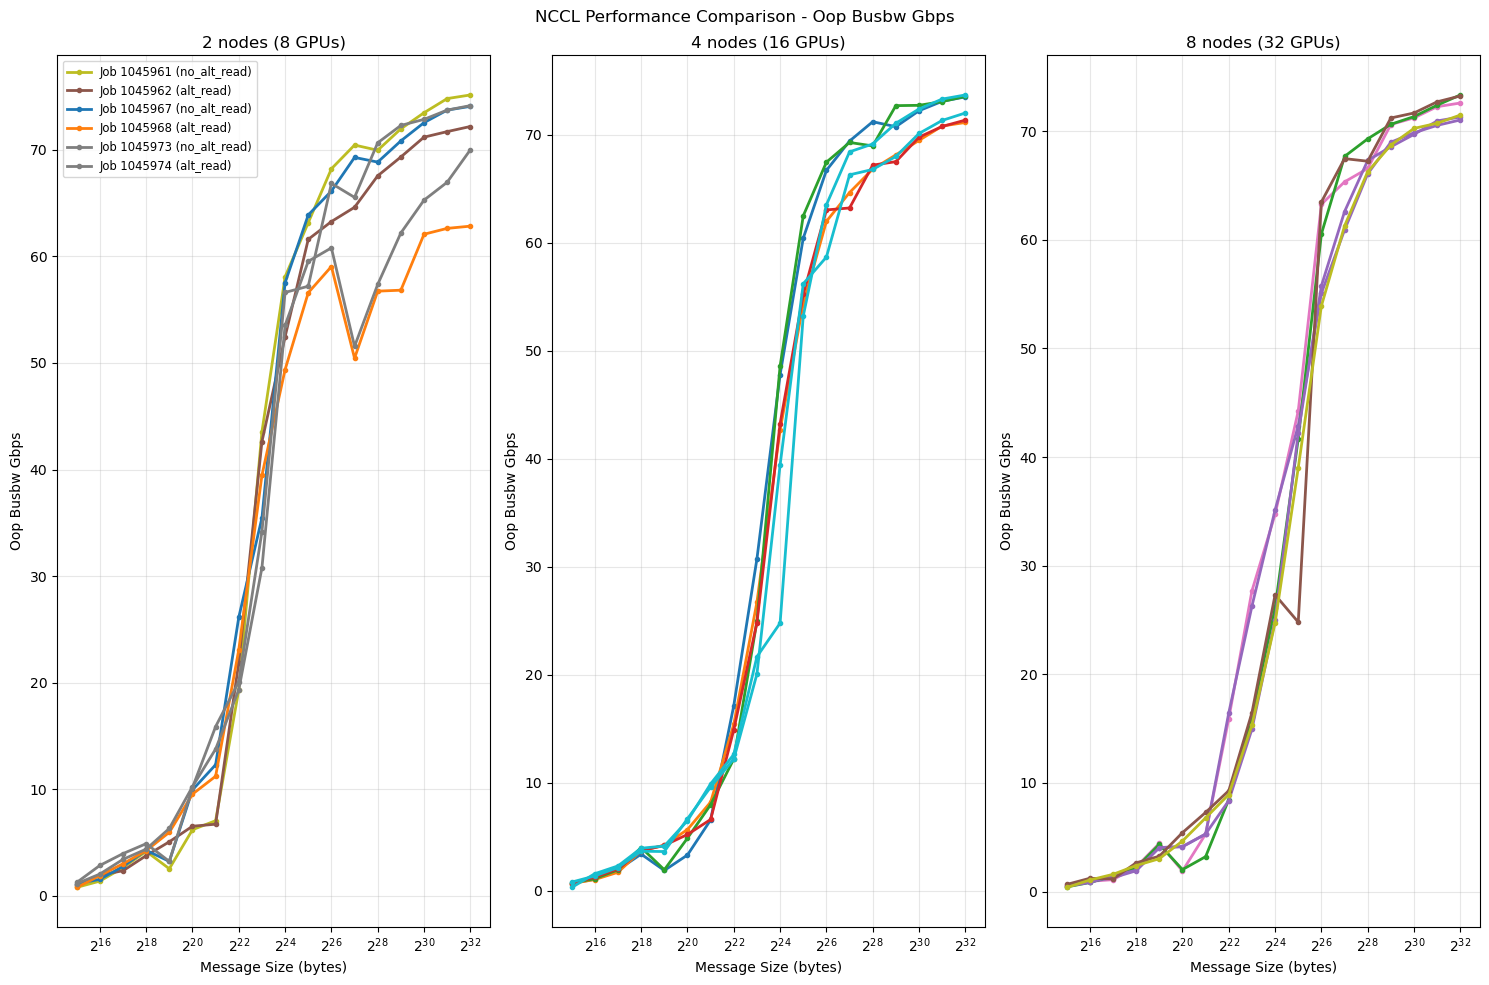

In [15]:
plot_nccl_comparison_matrix(perf_df);